In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

import itertools


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import roc_auc_score,precision_score,recall_score, f1_score,roc_curve, classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import ADASYN

from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,HalvingRandomSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

In [30]:
!pip install xgboost

In [31]:
!pip install scikit-optimize

# Importing the dataset

In [32]:
trainData=pd.read_csv('fraudTrain.csv')
testData=pd.read_csv('fraudTest.csv')

In [33]:
trainDataCopy=trainData.copy()
testDataCopy=testData.copy()

In [34]:
print(trainData.shape)
print(testData.shape)

(1296675, 23)
(555719, 23)


- We have 12,96,675 data points in train dataset and 5,55,719 data points in test data.Let's undertand the data more.

# 1. Data Understanding

In [35]:
trainData.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Checking Data types

In [36]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [37]:
# for test dataset
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

## A close look at Target Variable

In [38]:
trainData['is_fraud'].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

<AxesSubplot:xlabel='is_fraud', ylabel='Count'>

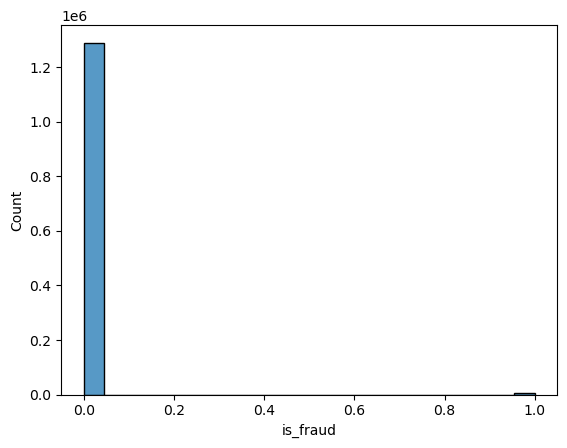

In [39]:
sns.histplot(data=trainData, x="is_fraud")

## Checking null Values

In [40]:
trainData.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [41]:
# for test dataset
testData.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Observation**

- `Unnamed` column contains the index only. Therefore, we don't need this column and we already have index.
-  `trans_num` doesn't provide that much of info, hence we will not be using it in our model
- `merchant`, `first_name`,`lastname`, `street` and `zip`, features don't seem useful as these can't be fed to ML model and if fed will only make it more complex.

---------------------------------------------------------------------------------------------------------------------------
- Features `trans_date_trans_time` and `dob` require typecasting as both are of object data type, but need to be of DateTime data type

---------------------------------------------------------------------------------------------------------------------------

- Target varible is `is_fraud`.
- There is a huge class imbalance as non-fraud class contributes about 99.42 % whereas fraud class contributes only 0.58%

---------------------------------------------------------------------------------------------------------------------------
- There are no null values present in the train as well as test data set!

**Next,**
- we will drop insignificant columns
- convert `trans_date_trans_time` and `dob` into DateTime object
- Look into categorical columns and do feature extraction where necessary
- handle class imbalance


# 2.  Data Cleaning

- Dropping `merchant`, `Unnamed`, `first`, `last`, `trans_num`, `street` and `zip`
- Also, let's look at categorical columns

In [42]:
cat_cols=['job','category','city','state']

In [43]:
for i in cat_cols:
    print(trainData[i].value_counts())
    print('\n')

Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: job, Length: 494, dtype: int64


gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64


Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce          

- There are too many categories of `job` and `city` so we can drop them as including them will make our model complex

In [44]:
drop_col= ['Unnamed: 0','first','last','merchant','street','zip','job','city']
trainData.drop(drop_col, axis =1, inplace = True)

In [45]:
trainData.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'state',
       'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

- Now we are left with 14 features

### Converting Data Types

- trans_date_trans_time

In [46]:
trainData['trans_date_trans_time'] = pd.to_datetime(trainData['trans_date_trans_time'])
trainData['trans_date_trans_time'].head()

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
3   2019-01-01 00:01:16
4   2019-01-01 00:03:06
Name: trans_date_trans_time, dtype: datetime64[ns]

- dob

In [47]:
trainData['dob'] = pd.to_datetime(trainData['dob'])
trainData['dob'].head()

0   1988-03-09
1   1978-06-21
2   1962-01-19
3   1967-01-12
4   1986-03-28
Name: dob, dtype: datetime64[ns]

In [48]:
# checking for duplicated rows
trainData.duplicated().sum()

0

# 3. Feature Engineering

In [49]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   dob                    1296675 non-null  datetime64[ns]
 10  trans_num              1296675 non-null  object        
 11  unix_time              1296675 non-null  int64         
 12  merch_lat              12966

We will do the following first

- Extract Day, Month and Hour == DayTime(Early Morning, Morning, Afternoon,Evening, Night,Late Night) from `trans_date_trans_time`
- Extract Age from `dob`
- Distance between current merchant Location and previous merchant location
- Distance between the customer loctaion and merchant location

### 3.1 Features from trans_date_trans_time

In [50]:
trainData['trans_hour'] = trainData['trans_date_trans_time'].dt.hour# extracting hour  from datetime
trainData['trans_day'] = trainData['trans_date_trans_time'].dt.day_name()
trainData['trans_month'] = trainData['trans_date_trans_time'].dt.month_name()

for i in ['trans_hour','trans_day','trans_month']:
    print(trainData[i].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


 **Binning trans_hour into** 
- Late Night:0-4
- Early Morning: 4-8
- Morning:8-12
- Afternoon:12-17
- Evening:17-21
- Night:21-0

In [51]:
trans_hour_bins=[-1,3,7,11,16,20,23]
trans_hour_labels=[ 'late_night','early_morning','morning','afternoon','evening','night',
                      ]
trainData['trans_hour_range']=pd.cut(trainData['trans_hour'],
                                       bins=trans_hour_bins,
                                       labels=trans_hour_labels)
trainData['trans_hour_range'].value_counts()

afternoon        326573
evening          262107
night            199619
late_night       170796
morning          169043
early_morning    168537
Name: trans_hour_range, dtype: int64

- looks Good!

### 3.2 Feature from dob - `Age`

<AxesSubplot:xlabel='Age'>

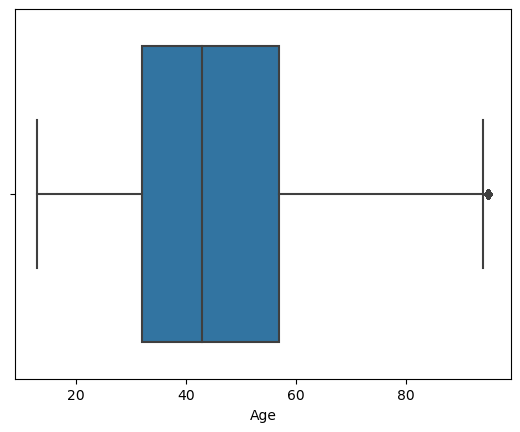

In [52]:
# calculting the age in days and converting it into years

trainData['Age'] = (trainData['trans_date_trans_time'] - trainData['dob']).astype('timedelta64[Y]') 
sns.boxplot(trainData['Age'])

In [53]:
trainData['Age'].describe().min()

13.0

In [54]:
age_bins=[10,25,40,55,70,100]
age_labels=[ '10-25','26-40','41-55','56-70','Above 70']

trainData['age_range']=pd.cut(trainData['Age'],
                                       bins=age_bins,
                                       labels=age_labels)
trainData['age_range'].value_counts()

26-40       413723
41-55       395763
56-70       216231
10-25       145054
Above 70    125904
Name: age_range, dtype: int64

### 3.3 Features from lat, long ,merch_lat and merch_long

In [55]:
from haversine import haversine, Unit

In [56]:
trainData['cust_loc']=tuple(zip(trainData['lat'],trainData['long']))

In [57]:
trainData[['lat','long','cust_loc']]

,lat,long,cust_loc
0,36.0788,-81.1781,"(36.0788, -81.1781)"
1,48.8878,-118.2105,"(48.8878, -118.2105)"
2,42.1808,-112.2620,"(42.1808, -112.262)"
3,46.2306,-112.1138,"(46.2306, -112.1138)"
4,38.4207,-79.4629,"(38.4207, -79.4629)"
...,...,...,...
1296670,37.7175,-112.4777,"(37.7175, -112.4777)"
1296671,39.2667,-77.5101,"(39.2667, -77.5101)"
1296672,32.9396,-105.8189,"(32.9396, -105.8189)"
1296673,43.3526,-102.5411,"(43.3526, -102.5411)"


In [58]:
trainData['merch_loc']=tuple(zip(trainData['merch_lat'],trainData['merch_long']))

In [59]:
trainData[['merch_lat','merch_long','merch_loc']]

,merch_lat,merch_long,merch_loc
0,36.011293,-82.048315,"(36.011293, -82.048315)"
1,49.159047,-118.186462,"(49.159047, -118.186462)"
2,43.150704,-112.154481,"(43.150704, -112.154481)"
3,47.034331,-112.561071,"(47.034331, -112.561071)"
4,38.674999,-78.632459,"(38.674999, -78.632459)"
...,...,...,...
1296670,36.841266,-111.690765,"(36.841266, -111.69076499999998)"
1296671,38.906881,-78.246528,"(38.906881, -78.246528)"
1296672,33.619513,-105.130529,"(33.619513, -105.130529)"
1296673,42.788940,-103.241160,"(42.78894, -103.24116)"


In [60]:
trainData[['cust_loc','merch_loc']]

,cust_loc,merch_loc
0,"(36.0788, -81.1781)","(36.011293, -82.048315)"
1,"(48.8878, -118.2105)","(49.159047, -118.186462)"
2,"(42.1808, -112.262)","(43.150704, -112.154481)"
3,"(46.2306, -112.1138)","(47.034331, -112.561071)"
4,"(38.4207, -79.4629)","(38.674999, -78.632459)"
...,...,...
1296670,"(37.7175, -112.4777)","(36.841266, -111.69076499999998)"
1296671,"(39.2667, -77.5101)","(38.906881, -78.246528)"
1296672,"(32.9396, -105.8189)","(33.619513, -105.130529)"
1296673,"(43.3526, -102.5411)","(42.78894, -103.24116)"


In [61]:
def calculateHaverstine(point1,point2):
    return round(haversine(point1, point2, unit='mi'),3)

In [62]:
trainData['cust_merc_dist']=trainData.apply(lambda df:calculateHaverstine(df['cust_loc'],df['merch_loc']), axis=1)

In [63]:
trainData.sort_values(by = ['cc_num','unix_time'],ascending=False,inplace=True)

In [64]:
trainData.head(5)

,trans_date_trans_time,cc_num,category,amt,gender,state,lat,long,city_pop,dob,...,is_fraud,trans_hour,trans_day,trans_month,trans_hour_range,Age,age_range,cust_loc,merch_loc,cust_merc_dist
1296427,2020-06-21 09:58:58,4992346398065154184,gas_transport,39.29,M,IL,41.173,-89.2187,532,1956-01-09,...,0,9,Sunday,June,morning,64.0,56-70,"(41.173, -89.2187)","(40.699593, -89.230938)",32.716
1296206,2020-06-21 08:04:28,4992346398065154184,shopping_pos,2.62,M,IL,41.173,-89.2187,532,1956-01-09,...,0,8,Sunday,June,morning,64.0,56-70,"(41.173, -89.2187)","(40.762861, -88.744967)",37.601
1295587,2020-06-21 02:47:59,4992346398065154184,shopping_net,246.56,M,IL,41.173,-89.2187,532,1956-01-09,...,0,2,Sunday,June,late_night,64.0,56-70,"(41.173, -89.2187)","(40.215418, -88.682562)",71.877
1295369,2020-06-21 00:41:01,4992346398065154184,gas_transport,74.29,M,IL,41.173,-89.2187,532,1956-01-09,...,0,0,Sunday,June,late_night,64.0,56-70,"(41.173, -89.2187)","(40.743634, -89.553379)",34.424
1294934,2020-06-20 21:04:59,4992346398065154184,personal_care,60.47,M,IL,41.173,-89.2187,532,1956-01-09,...,0,21,Saturday,June,night,64.0,56-70,"(41.173, -89.2187)","(40.475395, -89.076105)",48.773


In [65]:
trainData['prev_merch_loc']=trainData.groupby(by='cc_num')['merch_loc'].shift(-1)

In [66]:
trainData[['cc_num','merch_loc','prev_merch_loc']]

,cc_num,merch_loc,prev_merch_loc
1296427,4992346398065154184,"(40.699593, -89.230938)","(40.762861, -88.744967)"
1296206,4992346398065154184,"(40.762861, -88.744967)","(40.215418, -88.682562)"
1295587,4992346398065154184,"(40.215418, -88.682562)","(40.743634, -89.553379)"
1295369,4992346398065154184,"(40.743634, -89.553379)","(40.475395, -89.076105)"
1294934,4992346398065154184,"(40.475395, -89.076105)","(41.097559, -89.318727)"
...,...,...,...
2907,60416207185,"(43.321745, -108.091143)","(42.228227, -108.747683)"
2882,60416207185,"(42.228227, -108.747683)","(42.961335, -109.157564)"
2726,60416207185,"(42.961335, -109.157564)","(42.018766, -109.044172)"
2724,60416207185,"(42.018766, -109.044172)","(43.974711, -109.741904)"


In [67]:
trainData['prev_merch_loc'].fillna(trainData['merch_loc'],inplace=True)

In [68]:
trainData['prev_merch_dist']=trainData.apply(lambda df:calculateHaverstine(df['merch_loc'],df['prev_merch_loc']), axis=1)

In [69]:
trainData[['cc_num','merch_loc','prev_merch_loc','prev_merch_dist']]

,cc_num,merch_loc,prev_merch_loc,prev_merch_dist
1296427,4992346398065154184,"(40.699593, -89.230938)","(40.762861, -88.744967)",25.817
1296206,4992346398065154184,"(40.762861, -88.744967)","(40.215418, -88.682562)",37.967
1295587,4992346398065154184,"(40.215418, -88.682562)","(40.743634, -89.553379)",58.536
1295369,4992346398065154184,"(40.743634, -89.553379)","(40.475395, -89.076105)",31.148
1294934,4992346398065154184,"(40.475395, -89.076105)","(41.097559, -89.318727)",44.822
...,...,...,...,...
2907,60416207185,"(43.321745, -108.091143)","(42.228227, -108.747683)",82.566
2882,60416207185,"(42.228227, -108.747683)","(42.961335, -109.157564)",54.775
2726,60416207185,"(42.961335, -109.157564)","(42.018766, -109.044172)",65.381
2724,60416207185,"(42.018766, -109.044172)","(43.974711, -109.741904)",139.665


### 3.4 Features from unix_time

In [70]:
trainData['prev_unix_time']=trainData.groupby(by = ['cc_num'])['unix_time'].shift(-1)
trainData['prev_unix_time'].fillna(trainData['unix_time'] - 86400, inplace = True)

In [71]:
# calculating time delay in terms of minutes
trainData['prev_trans_time_delay'] = (trainData['unix_time'] - trainData['prev_unix_time'])//60

In [72]:
trainData.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'state',
       'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'trans_day', 'trans_month',
       'trans_hour_range', 'Age', 'age_range', 'cust_loc', 'merch_loc',
       'cust_merc_dist', 'prev_merch_loc', 'prev_merch_dist', 'prev_unix_time',
       'prev_trans_time_delay'],
      dtype='object')

We can drop following redundant columns:
- trans_hour
- dob
- cust_loc
- merch_loc
- lat and long
- prev_merch_loc
- prev_unix_time
- merch_lat and merch_long
- unix_time

In [73]:
trainData.drop(['trans_hour','dob','cust_loc',
                'merch_loc','lat','long','prev_merch_loc','prev_unix_time',
               'merch_lat','merch_long','unix_time','Age'],axis=1,inplace=True)

In [74]:
trainData.reset_index(drop=True, inplace = True)

In [75]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   city_pop               1296675 non-null  int64         
 7   trans_num              1296675 non-null  object        
 8   is_fraud               1296675 non-null  int64         
 9   trans_day              1296675 non-null  object        
 10  trans_month            1296675 non-null  object        
 11  trans_hour_range       1296675 non-null  category      
 12  age_range              12966

# 4. EDA

In [76]:
edaData=trainData.copy()

In [77]:
cat_cols=list(edaData.select_dtypes(['object','category']).columns)
cat_cols

['category',
 'gender',
 'state',
 'trans_num',
 'trans_day',
 'trans_month',
 'trans_hour_range',
 'age_range']

In [78]:
cat_cols.remove('trans_num')

In [79]:
num_cols=['amt','city_pop','cust_merc_dist','prev_merch_dist','prev_trans_time_delay']

### 4.1 Univariate Numerical Analysis

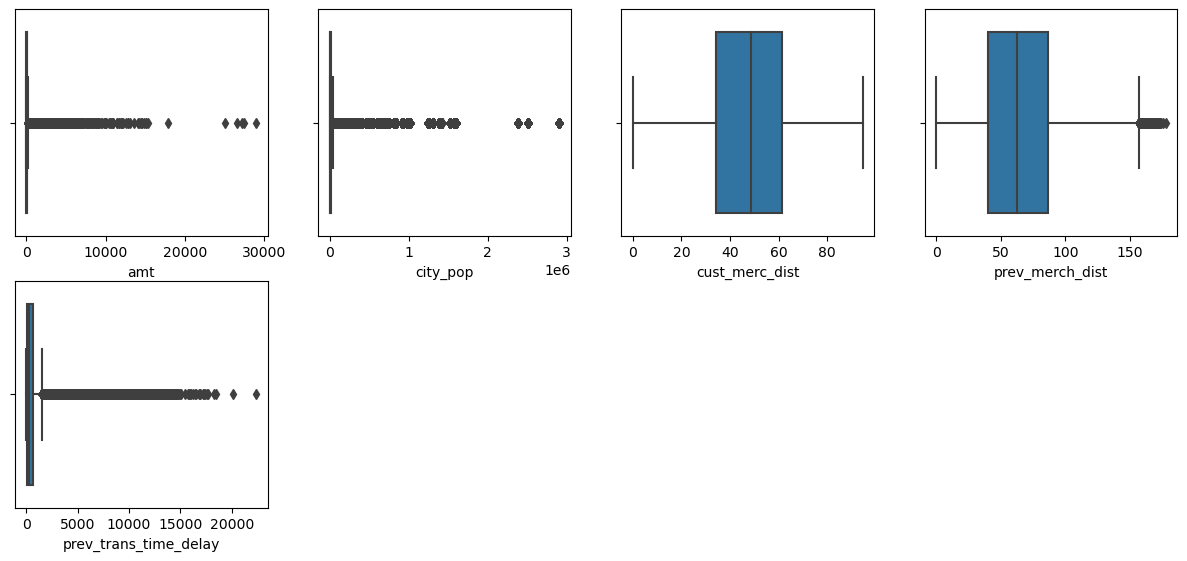

In [80]:
plt.figure(figsize = [15,10])

for i,col in enumerate(num_cols):
    plt.subplot(3,4,i+1)
    sns.boxplot(edaData[col])
plt.show()

**There are many outliers in**
- amt
- city_pop
- prev_trans_time_delay

In order to solve this issue, we will using capping method.

#### Capping of outliers

In [81]:
col_outliers=['amt','city_pop','prev_trans_time_delay']

In [82]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [83]:
edaData[col_outliers]= edaData[col_outliers].apply(cap_outliers, axis=0)

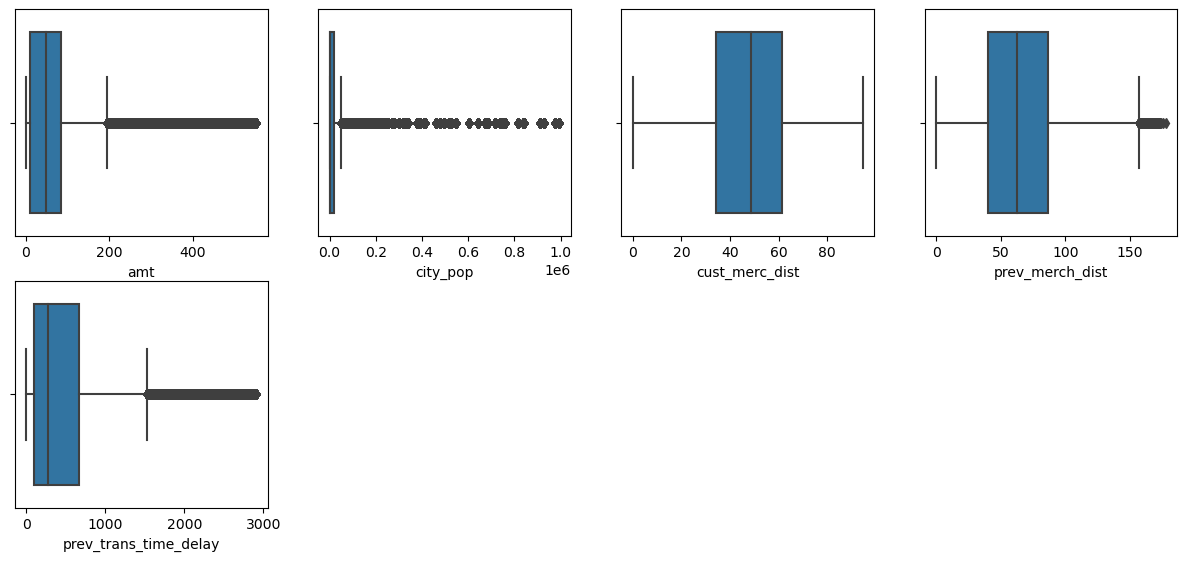

In [84]:
plt.figure(figsize = [15,10])

for i,col in enumerate(num_cols):
    plt.subplot(3,4,i+1)
    sns.boxplot(edaData[col])
plt.show()

- There are no significant outliers left and it looks Good!

#### Dividing the data based on target variable

In [85]:
fraudData=edaData[edaData['is_fraud']==1]
fraudData.head()

,trans_date_trans_time,cc_num,category,amt,gender,state,city_pop,trans_num,is_fraud,trans_day,trans_month,trans_hour_range,age_range,cust_merc_dist,prev_merch_dist,prev_trans_time_delay
901,2019-11-01 22:23:48,4992346398065154184,shopping_net,551.299151,M,IL,532.0,08637f518d059daf136435c0d6cba7a8,1,Friday,November,night,56-70,45.676,79.924,15.0
902,2019-11-01 22:08:45,4992346398065154184,shopping_net,551.299151,M,IL,532.0,2dfe4a737daedf1a3a9588296f820804,1,Friday,November,night,56-70,72.496,136.153,433.0
903,2019-11-01 14:55:10,4992346398065154184,shopping_net,551.299151,M,IL,532.0,18a89e9363dc82e07e44288ada82c115,1,Friday,November,afternoon,56-70,65.333,29.877,734.0
904,2019-11-01 02:40:44,4992346398065154184,grocery_pos,302.910000,M,IL,532.0,80a880d8f2fa3a24ebef9fbf93b4136f,1,Friday,November,late_night,56-70,69.219,74.620,164.0
905,2019-10-31 23:55:45,4992346398065154184,shopping_net,551.299151,M,IL,532.0,3799031bfaa2eaff4f195b7abbe07f62,1,Thursday,October,night,56-70,46.486,54.752,5.0


In [86]:
normalData=edaData[edaData['is_fraud']==0]
normalData.head()

,trans_date_trans_time,cc_num,category,amt,gender,state,city_pop,trans_num,is_fraud,trans_day,trans_month,trans_hour_range,age_range,cust_merc_dist,prev_merch_dist,prev_trans_time_delay
0,2020-06-21 09:58:58,4992346398065154184,gas_transport,39.29,M,IL,532.0,aa06c13e75117e05b57b4f4f438c21c6,0,Sunday,June,morning,56-70,32.716,25.817,114.0
1,2020-06-21 08:04:28,4992346398065154184,shopping_pos,2.62,M,IL,532.0,ae39b91cd2b4897ddbbf6bf63d3e7b03,0,Sunday,June,morning,56-70,37.601,37.967,316.0
2,2020-06-21 02:47:59,4992346398065154184,shopping_net,246.56,M,IL,532.0,9814049bcc69fb31d81f4a907f2fe255,0,Sunday,June,late_night,56-70,71.877,58.536,126.0
3,2020-06-21 00:41:01,4992346398065154184,gas_transport,74.29,M,IL,532.0,6d427d735c9f9b2fd480f2c24b6525de,0,Sunday,June,late_night,56-70,34.424,31.148,216.0
4,2020-06-20 21:04:59,4992346398065154184,personal_care,60.47,M,IL,532.0,ad7dfdf0aaa36cd7985dd1f35ca0e2fc,0,Saturday,June,night,56-70,48.773,44.822,512.0


In [87]:
normalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289169 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1289169 non-null  datetime64[ns]
 1   cc_num                 1289169 non-null  int64         
 2   category               1289169 non-null  object        
 3   amt                    1289169 non-null  float64       
 4   gender                 1289169 non-null  object        
 5   state                  1289169 non-null  object        
 6   city_pop               1289169 non-null  float64       
 7   trans_num              1289169 non-null  object        
 8   is_fraud               1289169 non-null  int64         
 9   trans_day              1289169 non-null  object        
 10  trans_month            1289169 non-null  object        
 11  trans_hour_range       1289169 non-null  category      
 12  age_range              12891

In [98]:
# Prev_trans_time_delay average for fraud trasactions

avg_fraud_trans_delay = fraudData.groupby(by='cc_num').prev_trans_time_delay.mean()
ff = avg_fraud_trans_delay.mean()
ff

391.36762815552146

In [100]:
avg_normal_trans_delay = normalData.groupby(by='cc_num').prev_trans_time_delay.mean()
nn = avg_normal_trans_delay.mean()
nn

682.6718433559862

<AxesSubplot:xlabel='cc_num'>

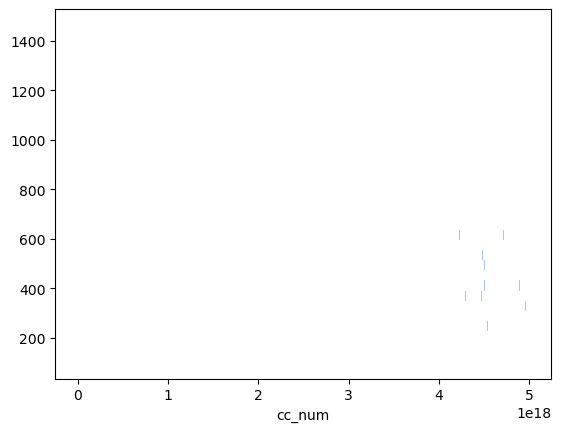

In [97]:
sns.histplot(x=avg_fraud_trans_delay.index, y=avg_fraud_trans_delay.values)

### 4.2  Categorical Features Analysis (Univariate and Bivariate)

In [ ]:

def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.1f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'is_fraud', data = train, ax = ax2)
    plt.xticks(rotation=45)
    plt.title('Plotting data for target in terms of total count')
    
    for val in ax2.patches:
            ax2.annotate('{:.1f}%'.format((val.get_height()/len(train))*100), (val.get_x(), val.get_height()))

    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['Non-Fraud']= ((train_0[col].value_counts())/len(train_0))
    df['Fraud']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')

    
    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [ ]:
for column in cat_cols:
    print("Plotting",column)
    plotting(edaData, normalData,fraudData, column)
    print("="*70)

In [ ]:
edaData.info()

## 5. Data Preparation and Processing

In [ ]:
edaData.info()

Dropping following columns that will be not passed to Model:
- cc_num
- state

In [ ]:
finalData=edaData.drop(columns=['cc_num','state'])

In [ ]:
finalData.head()

In [ ]:
cat_col=list(finalData.select_dtypes(['object','category']).columns)
cat_col

In [ ]:
cat_col.remove('trans_num')

### 5.1 OneHotEncoding - Creating Dummy Variables

In [ ]:
finalData[cat_col].nunique().sort_values(ascending = False)

In [ ]:
cat_col

In [ ]:
# using one hot encoding to create dummy variables for above columns
for i in cat_col:
    ls = pd.get_dummies(finalData[i], prefix=i,drop_first = True)
    #Adding the results to the master dataframe
    finalData = pd.concat([finalData,ls], axis=1)


In [ ]:
finalData.columns

In [ ]:
cat_col

- We can see new columns added. Let's drop the redundant columns

In [ ]:
finalData.drop(columns=cat_col,inplace=True)
finalData.head()

### 5.2 Correlation Matrix

In [ ]:
plt.figure(figsize=(30,20))
corr=finalData.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,cmap="YlGnBu",annot = True,fmt=".2f")
plt.show()

There's not much of high correlation seen in this graph

### 5.3 Test Train Data Split

In [ ]:
# Putting feature variable to X
Y = finalData.pop('is_fraud')
X=finalData
X.head()

In [ ]:
X.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
X_train.info()

### 5.4 Histogram Plots- Checking Skewness

In [ ]:
# for i in list(X_train.columns):
#     plt.figure(i)
#     sns.histplot(X_train[i])

- There is skewness in following numerical columns: amt,city_pop and prev_trans_time_delay.
- Let's use transformations to lessen the skewedness

In [ ]:
skewed_cols=['amt','city_pop','prev_trans_time_delay']
skewed_cols

In [ ]:
#Before skewing
X_train[skewed_cols].skew()

### Using log transformation

In [ ]:
transform_Data=X_train.copy()

In [ ]:
transform_Data[['amt']]=np.log(transform_Data[['amt']]+1)
transform_Data[['city_pop']]=np.log(transform_Data[['city_pop']]+1)
transform_Data[['prev_trans_time_delay']]=np.log(transform_Data[['prev_trans_time_delay']]+1)

In [ ]:
transform_Data[skewed_cols].describe()

In [ ]:
#After skewing
transform_Data[skewed_cols].skew()

- Applying log(x+1)as there are some zero values in the skewed columns

In [ ]:
X_train[skewed_cols]=transform_Data[skewed_cols]
transform_Data[skewed_cols].skew()

In [ ]:
for i in skewed_cols:
    plt.figure(i)
    sns.histplot(transform_Data[i])

#### Applying on test Dataset

In [ ]:
def applyTransformation(data):
    data[['amt']]=np.log(data[['amt']]+1)
    data[['city_pop']]=np.log(data[['city_pop']]+1)
    data[['prev_trans_time_delay']]=np.log(data[['prev_trans_time_delay']]+1)

In [ ]:
X_test[skewed_cols].skew()

In [ ]:
applyTransformation(X_test)

In [ ]:
X_test[skewed_cols].describe()

### 5.5 Feature scaling

In [ ]:
num_cols=['amt','city_pop','cust_merc_dist','prev_merch_dist','prev_trans_time_delay']

In [ ]:
X_train[num_cols].describe()

- using MinMaxScaler for standardization

In [ ]:
scale = MinMaxScaler()
X_train[num_cols] = scale.fit_transform(X_train[num_cols])

- Applying standardization on test dataset

In [ ]:
X_test[num_cols] = scale.transform(X_test[num_cols])

In [ ]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.boxplot(data = X_train)
plt.show()

**Summary**
- Now, we have data in a better shape with consistency
- But, there's a class imbalance in dataset
- Minority class need to have enough representation so that the model is not biased, hence oversampling of minority class is needed
- Under sampling of Majority class can be done so that it is repeatative in the terms of a common pottern across the dataset
- Also, dataset is huge for it to be used in hyperparameter tuning so will create two types of datasets

In [ ]:
#checking the shape
print(X_train.shape, y_train.shape,'\n')
print("Before OverSampling\n ")
print(y_train.value_counts(normalize = True)*100)

In [ ]:
X_train.columns

In [ ]:
del_cols=['trans_date_trans_time','trans_num']

In [ ]:
model_features=[i for i in list(X_train.columns) if i not in del_cols]
model_features

### 5.6  Handling Class Imbalance with Smote 
- Oversampling the Minority class Using SMOTE and Undersampling The Majority  class using RandomUnderSampler

- In some cases, combining the two random sampling techniques can lead to overall better performance than when the techniques are used alone.


In [ ]:
#importing useful libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [ ]:
# managing the length of the class

In [ ]:
maj_class_len= sum(y_train == 0)
maj_class_len

In [ ]:
min_class_len= sum(y_train == 1)
min_class_len

### Let's keep the sample length 1/3 rd of Majortiy class length

In [ ]:
sample_length=maj_class_len//3
sample_length

In [ ]:
resampling_pipeline = make_pipeline(SMOTE(
                                            sampling_strategy = {1:sample_length}, n_jobs = -1, random_state = 42
                                   ), # oversampling
                                  RandomUnderSampler(
                                      sampling_strategy = {0:sample_length},random_state = 42,
                                    ), # undersampling
                                  verbose = 1)

In [ ]:
X_train_resampled, y_train_resampled  = resampling_pipeline.fit_resample(X_train[model_features],y_train)

In [ ]:
#checking the shape after oversampling
print(X_train_resampled.shape, y_train_resampled.shape,'\n')
print("After OverSampling\n ")
print(y_train_resampled.value_counts(normalize = True)*100)

In [ ]:
X_train_resampled.head()

#### As we can see we have our class balanced

### Creating a sample for hyperparameter tuning

In [ ]:
sample_length=120000

In [ ]:
hp_tuning_pipeline = make_pipeline(SMOTE(
    sampling_strategy = {1:sample_length}, n_jobs = -1, random_state = 42
), 
RandomUnderSampler(sampling_strategy = {0:sample_length},random_state = 42),
                                  verbose = 1)

X_tuning_resampled, y_tuning_resampled = hp_tuning_pipeline.fit_resample(X_train[model_features],y_train)

In [ ]:
print(X_tuning_resampled.shape, y_tuning_resampled.shape)

### 5.7 Handling Class Imbalance with Adasyn

In [ ]:
adasyn = ADASYN() # creatin the adasyn object
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train[model_features],y_train) # performing adasyn oversampling

In [ ]:
print(X_train_adasyn.shape, y_train_adasyn.shape,'\n')
print("After OverSampling\n ")
print(y_train_adasyn.value_counts(normalize = True)*100)

## 6. Building Machine Learning Models

With the given Dataset Logistic Regression will not be able to give the desired results. Hence, will be using following algorithms:
- RandomForest
- Decision Tree
- XGBoostClassifier

### 6.1 Defining important functions to ease up model evaluation and performance checking

#### Creating a function to plot evaluation matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels=None):
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot the confusion matrix
    im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    if labels==None:
        labels = np.arange(cm.shape[0])
    
    # Add labels to the plot
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(len(labels)),
           yticks=np.arange(len(labels)),
           xticklabels=labels,
           yticklabels=labels)
    
    # Add colorbar to the plot
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Normalized Count", rotation=-90, va="bottom")
    
    # Loop over data dimensions and create text annotations.
    thresh = cm_normalized.max() / 2.
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i,f"{cm[i, j]} ({cm_normalized[i, j]*100:.1f}%)",
                    ha="center", va="center",
                    color="white" if cm_normalized[i, j] > thresh else "black")
    
    # Show the plot
    plt.show()


In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

#### Creating a function to Evaluate model performance using ROC curve, precision-recall curve, and F1 score.

In [ ]:
def evaluate_model_performance(model,modelName,X_train,y_train,y_true=y_test, X_test=X_test):
    #initializing the dataFrame
    evaluation_table=pd.DataFrame()
    for th in np.arange(0.1,1,0.1):
        
        #predicting values with threshold
        y_pred_train = (model.predict_proba(X_train)[:,1] > th).astype(np.int)
        y_pred_test = (model.predict_proba(X_test)[:,1] > th).astype(np.int)

        # Computing roc-auc curve,precision,recall, accuracy_score and f1 for train
        roc_auc_train = round(roc_auc_score(y_train,y_pred_train)*100,2)
        precision_train = round(precision_score(y_train,y_pred_train)*100,2)
        recall_train = round(recall_score(y_train,y_pred_train)*100,2)
        f1_train = round(f1_score(y_train,y_pred_train)*100,2)
        accuracy_train=accuracy_score(y_pred=y_pred_train, y_true=y_train)
        confusion_train = confusion_matrix(y_train,y_pred_train)
        TP_ = confusion_train[1,1] # true positive 
        TN_ = confusion_train[0,0] # true negatives
        FP_ = confusion_train[0,1] # false positives
        FN_ = confusion_train[1,0] # false negatives
        Sensitivity_train =round((TP_ / float(TP_+FN_))*100,2)
        Specificity_train =round((TN_ / float(TN_+FP_))*100,2)
        
        # Computing roc-auc curve,precision,recall, accuracy_score and f1 for test
        roc_auc_test = round(roc_auc_score(y_true,y_pred_test)*100,2)
        precision_test = round(precision_score(y_true,y_pred_test)*100,2)
        recall_test = round(recall_score(y_true,y_pred_test)*100,2)
        f1_test = round(f1_score(y_true,y_pred_test)*100,2)
        accuracy_test=accuracy_score(y_pred=y_pred_test, y_true=y_true)
        confusion_test = confusion_matrix(y_true,y_pred_test )
        TP = confusion_test[1,1] # true positive 
        TN = confusion_test[0,0] # true negatives
        FP = confusion_test[0,1] # false positives
        FN = confusion_test[1,0] # false negatives
        Sensitivity_test =round((TP / float(TP+FN))*100,2)
        Specificity_test =round((TN / float(TN+FP))*100,2)
        
         # Create dictionary with performance metrics
        performance = {'model':[modelName,modelName],'validation on':['Train','Test'],'threshold' : [th,th],'roc_auc' : [roc_auc_train,roc_auc_test],
                    'precision' : [precision_train, precision_test], 'recall' : [recall_train,recall_test],
                    'f1_score':[f1_train,f1_test],'accuracy' : [accuracy_train, accuracy_test],
                       'sensitivity' : [Sensitivity_train, Sensitivity_test],'specificity' : [Specificity_train, Specificity_test]}

        performance_table = pd.DataFrame(performance)

        evaluation_table = pd.concat([evaluation_table, performance_table], axis = 0)
    
  
    evaluation_table['sort_weight'] = evaluation_table[['roc_auc','precision','recall']].sum( axis = 1)
    evaluation_table.sort_values(by = ['validation on','sort_weight'], ascending = [True,False], inplace = True)
    evaluation_table.reset_index(inplace = True, drop = True)

    test_data = evaluation_table[evaluation_table['validation on'] == 'Test']
    test_data.reset_index(inplace = True, drop = True)

    optimal_threshold = test_data.iloc[0]['threshold']

    best_evaluation = evaluation_table[evaluation_table['threshold'] == optimal_threshold]

    best_evaluation.sort_values(by = 'validation on', ascending = False, inplace = True)

    y_pred_test_optimal_threshold = (model.predict_proba(X_test)[:,1] > optimal_threshold).astype(np.int)  

    plot_confusion_matrix(y_true=y_true,y_pred = y_pred_test_optimal_threshold, labels = ['Non-Fraud','Fraud']) 
    
    
    draw_roc(y_true,y_pred_test_optimal_threshold)
    
    

    result = {'evaluation_table':evaluation_table, 'best_params':best_evaluation,'test_data': test_data}

    return result # return

### 6.2 Model Building

### Model 1: RandomForestClassifier

In [116]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601604 entries, 0 to 601603
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             601604 non-null  float64
 1   city_pop                        601604 non-null  float64
 2   cust_merc_dist                  601604 non-null  float64
 3   prev_merch_dist                 601604 non-null  float64
 4   prev_trans_time_delay           601604 non-null  float64
 5   category_food_dining            601604 non-null  uint8  
 6   category_gas_transport          601604 non-null  uint8  
 7   category_grocery_net            601604 non-null  uint8  
 8   category_grocery_pos            601604 non-null  uint8  
 9   category_health_fitness         601604 non-null  uint8  
 10  category_home                   601604 non-null  uint8  
 11  category_kids_pets              601604 non-null  uint8  
 12  category_misc_ne

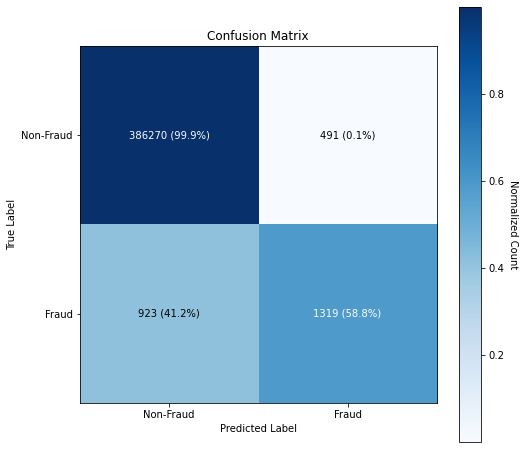

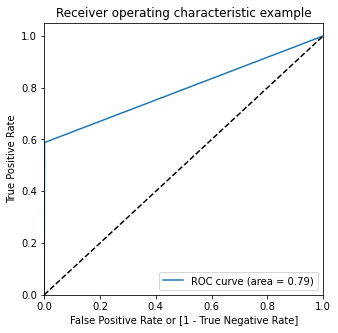

In [117]:
rf_model = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split= 50, random_state=42, n_jobs = -1)
rf_model.fit(X_train_resampled,y_train_resampled) 
rf_model_eval = evaluate_model_performance(rf_model,'Random Forest Classifier',X_train_resampled, y_train_resampled,y_test,X_test[model_features]) # evaluating the model by the function call

In [118]:
rf_model_eval['best_params']

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
16,Random Forest Classifier,Train,0.9,83.46,99.82,67.03,80.2,0.834554,67.03,99.88,250.31
0,Random Forest Classifier,Test,0.9,79.35,72.87,58.83,65.1,0.996365,58.83,99.87,211.05


In [119]:
rf_model_eval['evaluation_table']

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,Random Forest Classifier,Test,0.9,79.35,72.87,58.83,65.10,0.996365,58.83,99.87,211.05
1,Random Forest Classifier,Test,0.8,83.49,57.73,67.26,62.13,0.995275,67.26,99.71,208.48
2,Random Forest Classifier,Test,0.6,90.44,34.83,81.76,48.85,0.990134,81.76,99.11,207.03
3,Random Forest Classifier,Test,0.7,86.42,47.04,73.33,57.31,0.993704,73.33,99.52,206.79
4,Random Forest Classifier,Test,0.5,93.59,20.72,89.16,33.63,0.979717,89.16,98.02,203.47
5,Random Forest Classifier,Test,0.4,94.74,10.44,94.16,18.79,0.953106,94.16,95.32,199.34
6,Random Forest Classifier,Test,0.3,92.17,4.25,97.01,8.14,0.873865,97.01,87.33,193.43
7,Random Forest Classifier,Test,0.2,85.96,2.12,98.13,4.16,0.739403,98.13,73.80,186.21
8,Random Forest Classifier,Test,0.1,70.62,0.98,99.73,1.94,0.418395,99.73,41.50,171.33
9,Random Forest Classifier,Train,0.4,95.45,95.45,95.45,95.45,0.954512,95.45,95.46,286.35


- Model is clearly overfitting in here and ROC_curve is also not giving a good sign

#### With Hyperparameter tuning using HalvingRandomSearchCV

The given dataset is very large so, it will take a lot of time to use GridSearchCV. Instead of it, we will be using 
HalvingRandomSearchCV. Since its algorithm follows a successive halving approach, so the time complexity of the algorithm is comparatively very less compared to Grid Search CV.

In [120]:
hyper_params_rcv = {
    'n_estimators' : [100,200,300,500],
    'max_depth': [10,15,20],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10,20,30,50],
    'max_features': ['sqrt', 'log2'],
    "class_weight": [ {1:1, 0:20},{1:1, 0:20}, {1:20,0:1},{1:10,0:1},],
    }

In [121]:
model_2 = RandomForestClassifier(random_state=42)

In [122]:
#for cross vaidation
skf_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [123]:
model_rfc = HalvingRandomSearchCV(estimator=model_2,
                              param_distributions=hyper_params_rcv,
                              verbose=1,
                              cv=skf_cv,
                            refit = True,
                            scoring = 'roc_auc',
                              return_train_score=True,
                              n_jobs=-1)

In [124]:
%%time
model_rfc.fit(X_tuning_resampled, y_tuning_resampled)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 9
min_resources_: 20
max_resources_: 240000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1152
n_resources: 20
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
----------
iter: 1
n_candidates: 384
n_resources: 60
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
----------
iter: 2
n_candidates: 128
n_resources: 180
Fitting 5 folds for each of 128 candidates, totalling 640 fits
----------
iter: 3
n_candidates: 43
n_resources: 540
Fitting 5 folds for each of 43 candidates, totalling 215 fits
----------
iter: 4
n_candidates: 15
n_resources: 1620
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 5
n_candidates: 5
n_resources: 4860
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 21min 10s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(random_state=42),
                      n_jobs=-1,
                      param_distributions={'class_weight': [{0: 20, 1: 1},
                                                            {0: 20, 1: 1},
                                                            {0: 1, 1: 20},
                                                            {0: 1, 1: 10}],
                                           'max_depth': [10, 15, 20],
                                           'max_features': ['sqrt', 'log2'],
                                           'min_samples_leaf': [10, 20, 30, 50],
                                           'min_samples_split': [10, 20, 30],
                                           'n_estimators': [100, 200, 300,
                                                            500]},
                      scoring='roc_auc', verbose=1)

In [125]:
 model_rfc.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 20,
 'class_weight': {1: 1, 0: 20}}

In [126]:
best_params={'n_estimators': 300,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 20,
 'class_weight': {1: 1, 0: 20}}

In [127]:
model_2.set_params(**best_params) # using best parameters to the model

# fitting on the training sample
model_2.fit(X_train_resampled,y_train_resampled) 

RandomForestClassifier(class_weight={0: 20, 1: 1}, max_depth=20,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=300, random_state=42)

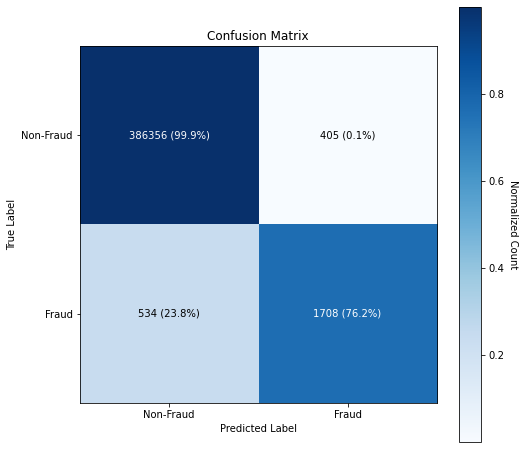

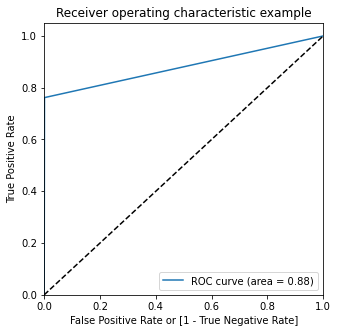

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
14,RFC | Tuned,Train,0.6,90.93,99.96,81.90,90.03,0.909346,81.90,99.97,272.79
0,RFC | Tuned,Test,0.6,88.04,80.83,76.18,78.44,0.997586,76.18,99.90,245.05


In [128]:
model_2_eval = evaluate_model_performance(model_2,'RFC | Tuned',X_train_resampled, y_train_resampled,y_test,X_test[model_features])

model_2_eval['best_params']

In [129]:
model_2_eval['evaluation_table']

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,RFC | Tuned,Test,0.6,88.04,80.83,76.18,78.44,0.997586,76.18,99.90,245.05
1,RFC | Tuned,Test,0.5,89.50,73.62,79.17,76.29,0.997165,79.17,99.84,242.29
2,RFC | Tuned,Test,0.7,84.25,87.58,68.55,76.91,0.997627,68.55,99.94,240.38
3,RFC | Tuned,Test,0.4,90.82,64.76,81.89,72.33,0.996388,81.89,99.74,237.47
4,RFC | Tuned,Test,0.3,92.32,53.89,85.06,65.97,0.994943,85.06,99.58,231.27
5,RFC | Tuned,Test,0.8,78.40,93.68,56.82,70.74,0.997291,56.82,99.98,228.90
6,RFC | Tuned,Test,0.2,94.37,38.91,89.56,54.26,0.991296,89.56,99.19,222.84
7,RFC | Tuned,Test,0.1,96.34,19.19,95.00,31.93,0.976658,95.00,97.68,210.53
8,RFC | Tuned,Test,0.9,70.18,98.58,40.37,57.28,0.996530,40.37,100.00,209.13
9,RFC | Tuned,Train,0.1,97.66,98.21,97.09,97.65,0.976596,97.09,98.23,292.96


- Precision and recall has improved. Let's check  other models

###  Model 2: Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
model_3 = DecisionTreeClassifier(max_depth = 20, min_samples_split= 20, random_state=42) # creating the model object

model_3.fit(X_train_resampled,y_train_resampled) # fitting the model with train_sample


DecisionTreeClassifier(max_depth=20, min_samples_split=20, random_state=42)

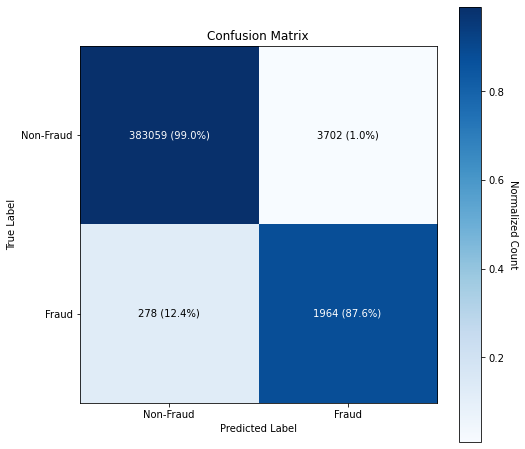

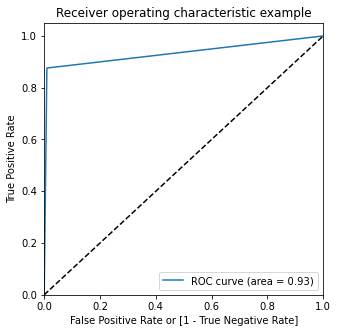

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
17,DT | Normal,Train,0.9,97.73,99.43,96.01,97.69,0.977299,96.01,99.45,293.17
0,DT | Normal,Test,0.9,93.32,34.66,87.60,49.67,0.989769,87.60,99.04,215.58


In [132]:
model_3_eval = evaluate_model_performance(model_3,'DT | Normal',X_train_resampled, y_train_resampled,y_test,X_test[model_features]) # calling the evaluate model function

model_3_eval['best_params']

- It's also overfitting badly 

#### Using hyperparameter tuning

In [133]:
hyper_params_dt = {
    'max_depth': [10,15,20],
    'min_samples_split': [5,10,20,30,50],
    'min_samples_leaf': [5,10,20,30,50],
    'max_features': ['sqrt', 'log2'],
    "class_weight":[{0:1,1:20},{0:20,1:1}]
    }

In [134]:
model_4 = DecisionTreeClassifier(random_state=42)
#for cross vaidation
skf_cv_dt = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [135]:
model_dt = HalvingRandomSearchCV(estimator=model_4,
                              param_distributions=hyper_params_dt,
                              verbose=1,
                              cv=skf_cv_dt,
                            refit = True,
                            scoring = 'roc_auc',
                              return_train_score=True,
                              n_jobs=-1,)

In [136]:
model_dt.fit(X_train_resampled,y_train_resampled)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 10
min_resources_: 20
max_resources_: 601604
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 300
n_resources: 20
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 100
n_resources: 60
Fitting 5 folds for each of 100 candidates, totalling 500 fits
----------
iter: 2
n_candidates: 34
n_resources: 180
Fitting 5 folds for each of 34 candidates, totalling 170 fits
----------
iter: 3
n_candidates: 12
n_resources: 540
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 4
n_resources: 1620
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 4860
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=DecisionTreeClassifier(random_state=42),
                      n_jobs=-1,
                      param_distributions={'class_weight': [{0: 1, 1: 20},
                                                            {0: 20, 1: 1}],
                                           'max_depth': [10, 15, 20],
                                           'max_features': ['sqrt', 'log2'],
                                           'min_samples_leaf': [5, 10, 20, 30,
                                                                50],
                                           'min_samples_split': [5, 10, 20, 30,
                                                                 50]},
                      scoring='roc_auc', verbose=1)

In [137]:
best_params_dt=model_dt.best_params_
best_params_dt

{'min_samples_split': 30,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 20,
 'class_weight': {0: 1, 1: 20}}

In [138]:
model_4.set_params(**best_params_dt ) # using best parameters to the model

# fitting on the training sample
model_4.fit(X_train_resampled,y_train_resampled) 

DecisionTreeClassifier(class_weight={0: 1, 1: 20}, max_depth=20,
                       max_features='log2', min_samples_leaf=5,
                       min_samples_split=30, random_state=42)

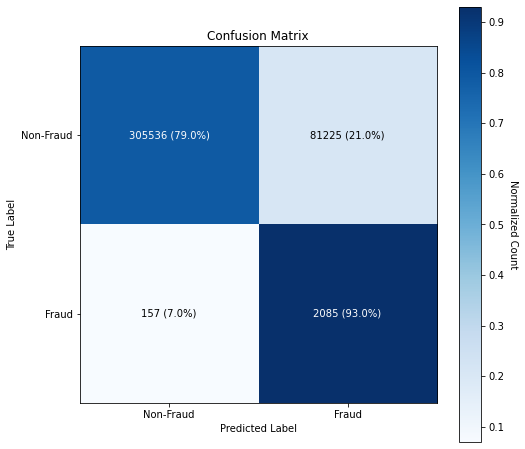

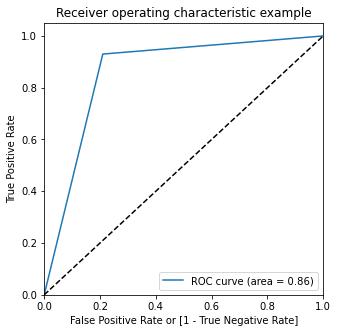

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
13,DT | Tuned,Train,0.5,89.56,82.79,99.89,90.54,0.895599,99.89,79.23,272.24
0,DT | Tuned,Test,0.5,86.00,2.50,93.00,4.87,0.790793,93.00,79.00,181.50


In [139]:
model_4_eval = evaluate_model_performance(model_4,'DT | Tuned',X_train_resampled, y_train_resampled,y_test,X_test[model_features]) # calling the evaluate model function

model_4_eval['best_params']

- It still is not up to the mark as metrics of test dataset are not good. Precision is very low

###  Model 3: XGBoostClassifier

In [140]:
from xgboost import XGBClassifier
from skopt import BayesSearchCV,space

In [141]:
%%time
model_5 = XGBClassifier(n_estimators = 500,
                        max_depth = 8,
                        learning_rate = 0.01,
                        n_jobs = -1,
                        random_state = 42,) # create the object
 

model_5.fit(X_train_resampled,y_train_resampled) # fitting the training sample

Wall time: 6min 6s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

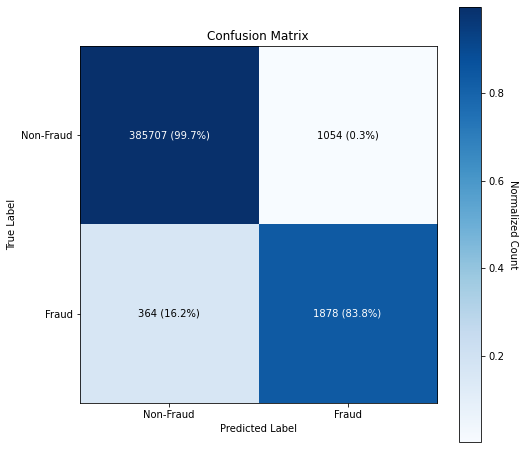

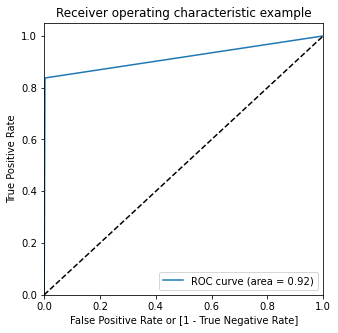

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
17,XGBoost | Normal,Train,0.9,93.46,99.72,87.17,93.02,0.934608,87.17,99.75,280.35
0,XGBoost | Normal,Test,0.9,91.75,64.05,83.76,72.59,0.996355,83.76,99.73,239.56


In [142]:
model_5_eval = evaluate_model_performance(model_5,'XGBoost | Normal',X_train_resampled, y_train_resampled,y_test,X_test[model_features]) # evaluating the model

model_5_eval['best_params']

In [143]:
model_5_eval['evaluation_table']

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,XGBoost | Normal,Test,0.9,91.75,64.05,83.76,72.59,0.996355,83.76,99.73,239.56
1,XGBoost | Normal,Test,0.8,94.38,45.72,89.38,60.50,0.993273,89.38,99.38,229.48
2,XGBoost | Normal,Test,0.7,95.65,34.16,92.33,49.87,0.989301,92.33,98.97,222.14
3,XGBoost | Normal,Test,0.6,96.24,26.15,94.02,40.92,0.984350,94.02,98.46,216.41
4,XGBoost | Normal,Test,0.5,96.58,19.48,95.45,32.36,0.977005,95.45,97.71,211.51
5,XGBoost | Normal,Test,0.4,96.64,15.09,96.43,26.09,0.968509,96.43,96.85,208.16
6,XGBoost | Normal,Test,0.3,96.54,11.24,97.55,20.16,0.955468,97.55,95.54,205.33
7,XGBoost | Normal,Test,0.2,96.11,8.35,98.48,15.39,0.937579,98.48,93.73,202.94
8,XGBoost | Normal,Test,0.1,93.85,4.68,99.46,8.93,0.883088,99.46,88.24,197.99
9,XGBoost | Normal,Train,0.4,97.38,96.99,97.79,97.39,0.973755,97.79,96.96,292.16


- Recall is good but, precision is very low, let's perform hyperparameter tuning

#### Hyperparameter tuning using RandomizedSearchCV

In [144]:
hyper_params_xg = {'n_estimators' : range(250,400,10),
                 'max_depth': [3, 4, 5],
                'min_child_weight':[1,4,8],
               'learning_rate' : [0.001,0.01,0.02,0.03],
               'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample':[i/10.0 for i in range(6,10)],
                 'colsample_bytree':[i/10.0 for i in range(6,10)]
               }

In [145]:
model_6= XGBClassifier(random_state = 42,objective='binary:logistic')

In [146]:
%%time
skf_cv_xg = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_xg_cv = RandomizedSearchCV(model_6,
                                 param_distributions=hyper_params_xg,
                         cv=skf_cv_xg,
                       n_iter = 10,
                       scoring = 'roc_auc',
                       n_jobs = -1,
                       verbose = 1,
                       random_state = 42
                       )
model_xg_cv.fit(X_tuning_resampled,y_tuning_resampled) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 29min 5s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importan...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.03],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 4, 8],
                                        'n_estimators': range(250, 400, 10),
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [147]:
model_xg_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 310,
 'min_child_weight': 8,
 'max_depth': 4,
 'learning_rate': 0.03,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

In [148]:
best_params_xg=model_xg_cv.best_params_

In [149]:
%%time
model_6.set_params(**best_params_xg)

Wall time: 0 ns


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=310, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [150]:
model_6.fit(X_train_resampled, y_train_resampled) # fitting on the train_sample

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=310, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

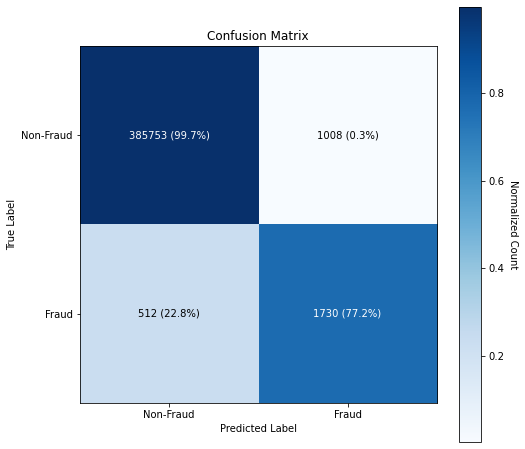

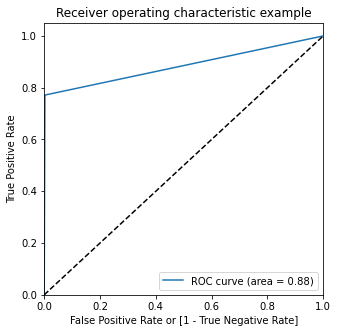

In [151]:
model_6_eval = evaluate_model_performance(model_6,'XGBoost | Tuned',X_train_resampled, y_train_resampled,y_test,X_test[model_features])

In [152]:
model_6_eval['evaluation_table'].sort_values(by='threshold',ascending=False)

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,XGBoost | Tuned,Test,0.9,88.45,63.18,77.16,69.48,0.996093,77.16,99.74,228.79
16,XGBoost | Tuned,Train,0.9,91.00,99.67,82.27,90.14,0.910006,82.27,99.73,272.94
1,XGBoost | Tuned,Test,0.8,91.57,43.62,83.76,57.37,0.992825,83.76,99.37,218.95
15,XGBoost | Tuned,Train,0.8,93.17,99.30,86.96,92.72,0.931724,86.96,99.38,279.43
2,XGBoost | Tuned,Test,0.7,93.97,28.40,89.25,43.08,0.986409,89.25,98.70,211.62
13,XGBoost | Tuned,Train,0.7,95.19,98.65,91.64,95.02,0.951937,91.64,98.74,285.48
3,XGBoost | Tuned,Test,0.6,95.30,19.57,92.82,32.32,0.977599,92.82,97.79,207.69
11,XGBoost | Tuned,Train,0.6,96.07,97.77,94.28,95.99,0.960662,94.28,97.85,288.12
9,XGBoost | Tuned,Train,0.5,96.35,96.73,95.94,96.33,0.963459,95.94,96.75,289.02
4,XGBoost | Tuned,Test,0.5,95.95,14.20,95.23,24.72,0.966571,95.23,96.67,205.38


In [153]:
model_6_eval['best_params']

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
16,XGBoost | Tuned,Train,0.9,91.00,99.67,82.27,90.14,0.910006,82.27,99.73,272.94
0,XGBoost | Tuned,Test,0.9,88.45,63.18,77.16,69.48,0.996093,77.16,99.74,228.79


-  Precision and Recall doesn't looks good 

### Using Adasyn sample on 

In [712]:
model_7= XGBClassifier(random_state = 42)
model_7.set_params(**best_params_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=310, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [713]:
model_7.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=310, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

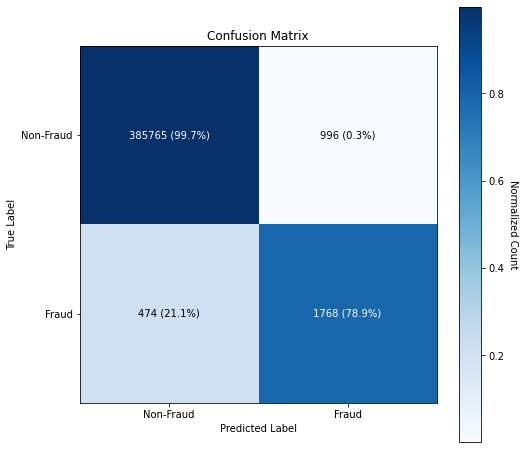

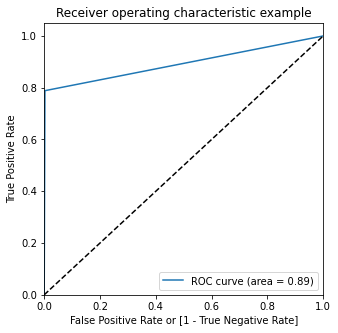

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,XGBoost | Tuned-Adasyn,Test,0.9,89.30,63.97,78.86,70.64,0.996221,78.86,99.74,232.13
1,XGBoost | Tuned-Adasyn,Test,0.8,91.97,42.03,84.61,56.17,0.992388,84.61,99.32,218.61
2,XGBoost | Tuned-Adasyn,Test,0.7,94.19,25.27,89.92,39.45,0.984093,89.92,98.46,209.38
3,XGBoost | Tuned-Adasyn,Test,0.6,95.41,16.90,93.49,28.62,0.973129,93.49,97.34,205.80
4,XGBoost | Tuned-Adasyn,Test,0.5,95.77,12.50,95.41,22.11,0.961252,95.41,96.13,203.68
5,XGBoost | Tuned-Adasyn,Test,0.4,95.85,9.94,96.79,18.02,0.949247,96.79,94.91,202.58
6,XGBoost | Tuned-Adasyn,Test,0.3,95.28,7.32,97.73,13.62,0.928553,97.73,92.83,200.33
7,XGBoost | Tuned-Adasyn,Test,0.2,93.34,4.51,98.80,8.63,0.879379,98.80,87.87,196.65
8,XGBoost | Tuned-Adasyn,Test,0.1,87.54,2.30,99.64,4.49,0.755693,99.64,75.43,189.48
9,XGBoost | Tuned-Adasyn,Train,0.5,95.85,96.13,95.55,95.84,0.958499,95.55,96.15,287.53


In [714]:
model_7_eval = evaluate_model_performance(model_7,'XGBoost | Tuned-Adasyn',X_train_adasyn, y_train_adasyn,y_test,X_test[model_features])
model_7_eval['evaluation_table']

### Using Simple smote 

In [715]:
model_8= XGBClassifier(random_state = 42)
model_8.set_params(**best_params_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=310, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [716]:
smote_full = SMOTE()
X_train_all, y_train_all = smote_full.fit_resample(X_train[model_features],y_train)

In [717]:
model_8.fit(X_train_all, y_train_all)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=310, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

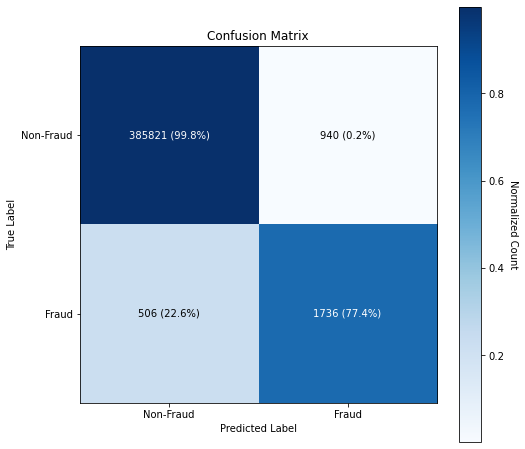

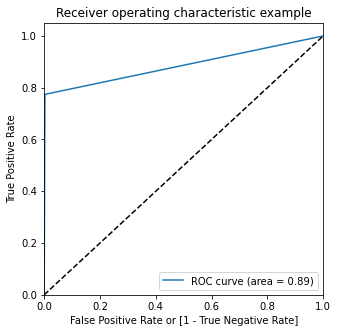

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,XGBoost | Tuned-Smote-Full,Test,0.9,88.59,64.87,77.43,70.60,0.996283,77.43,99.76,230.89
1,XGBoost | Tuned-Smote-Full,Test,0.8,91.56,48.40,83.63,61.31,0.993918,83.63,99.48,223.59
2,XGBoost | Tuned-Smote-Full,Test,0.7,93.78,30.13,88.76,44.99,0.987489,88.76,98.81,212.67
3,XGBoost | Tuned-Smote-Full,Test,0.6,95.09,19.56,92.37,32.29,0.977671,92.37,97.80,207.02
4,XGBoost | Tuned-Smote-Full,Test,0.5,95.93,14.05,95.23,24.49,0.966149,95.23,96.62,205.21
5,XGBoost | Tuned-Smote-Full,Test,0.4,95.92,10.95,96.39,19.66,0.954599,96.39,95.45,203.26
6,XGBoost | Tuned-Smote-Full,Test,0.3,95.65,8.45,97.41,15.55,0.939021,97.41,93.88,201.51
7,XGBoost | Tuned-Smote-Full,Test,0.2,94.19,5.32,98.53,10.10,0.898931,98.53,89.84,198.04
8,XGBoost | Tuned-Smote-Full,Test,0.1,88.65,2.53,99.55,4.93,0.778709,99.55,77.75,190.73
9,XGBoost | Tuned-Smote-Full,Train,0.5,96.33,96.63,96.01,96.32,0.963297,96.01,96.65,288.97


In [718]:
model_8_eval = evaluate_model_performance(model_8,'XGBoost | Tuned-Smote-Full',X_train_all, y_train_all,y_test,X_test[model_features])
model_8_eval['evaluation_table']

## 7 .Final Model Selection

In [158]:
model_eval_list = [rf_model_eval['test_data'], model_2_eval['test_data'], model_3_eval['test_data'],
                   model_4_eval['test_data'], model_5_eval['test_data'], model_6_eval['test_data'],
                   model_7_eval['test_data'],model_8_eval['test_data']]

final_list = pd.concat(model_eval_list, axis = 0)

NameError: name 'model_7_eval' is not defined

In [159]:
pd.set_option('display.max_rows', None)

In [723]:
final_list

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,Random Forest Classifier,Test,0.9,79.35,72.87,58.83,65.10,0.996365,58.83,99.87,211.05
1,Random Forest Classifier,Test,0.8,83.49,57.73,67.26,62.13,0.995275,67.26,99.71,208.48
2,Random Forest Classifier,Test,0.6,90.44,34.83,81.76,48.85,0.990134,81.76,99.11,207.03
3,Random Forest Classifier,Test,0.7,86.42,47.04,73.33,57.31,0.993704,73.33,99.52,206.79
4,Random Forest Classifier,Test,0.5,93.59,20.72,89.16,33.63,0.979717,89.16,98.02,203.47
5,Random Forest Classifier,Test,0.4,94.74,10.44,94.16,18.79,0.953106,94.16,95.32,199.34
6,Random Forest Classifier,Test,0.3,92.17,4.25,97.01,8.14,0.873865,97.01,87.33,193.43
7,Random Forest Classifier,Test,0.2,85.96,2.12,98.13,4.16,0.739403,98.13,73.80,186.21
8,Random Forest Classifier,Test,0.1,70.62,0.98,99.73,1.94,0.418395,99.73,41.50,171.33
0,RFC | Tuned,Test,0.6,88.04,80.83,76.18,78.44,0.997586,76.18,99.90,245.05


#### After following all the possible steps of handling Data Imbalance like SMOTE, ADASYN. Hyperparameter Tuning techniques, Important Parameter selection and Evaluation criteria like ROC/AUC curve, Precision, Recall and threshold. The best possible scores are observed by the Random Forest Classifier Model :




### Feature Importance

In [160]:
imp_features = model_2.feature_importances_ # access the feature importances from the best model

feature_importance = pd.DataFrame({'feature':X_train_resampled.columns, 'importances':imp_features})

feature_importance = feature_importance.sort_values(by='importances', ascending=False) # print the feature importances

In [161]:
feature_importance.head(20)

,feature,importances
0,amt,0.631056
4,prev_trans_time_delay,0.043366
40,trans_hour_range_night,0.041097
8,category_grocery_pos,0.028947
38,trans_hour_range_afternoon,0.023842
6,category_gas_transport,0.020814
39,trans_hour_range_evening,0.019234
36,trans_hour_range_early_morning,0.016140
15,category_shopping_net,0.015352
37,trans_hour_range_morning,0.015088


In [162]:
selected_features = feature_importance.feature.to_list()[:20]
selected_features

['amt',
 'prev_trans_time_delay',
 'trans_hour_range_night',
 'category_grocery_pos',
 'trans_hour_range_afternoon',
 'category_gas_transport',
 'trans_hour_range_evening',
 'trans_hour_range_early_morning',
 'category_shopping_net',
 'trans_hour_range_morning',
 'category_travel',
 'city_pop',
 'cust_merc_dist',
 'prev_merch_dist',
 'category_misc_net',
 'category_misc_pos',
 'age_range_56-70',
 'gender_M',
 'age_range_26-40',
 'category_shopping_pos']

In [163]:
model_2.fit(X_train_resampled[selected_features], y_train_resampled)

RandomForestClassifier(class_weight={0: 20, 1: 1}, max_depth=20,
                       min_samples_leaf=10, min_samples_split=20,
                       n_estimators=300, random_state=42)

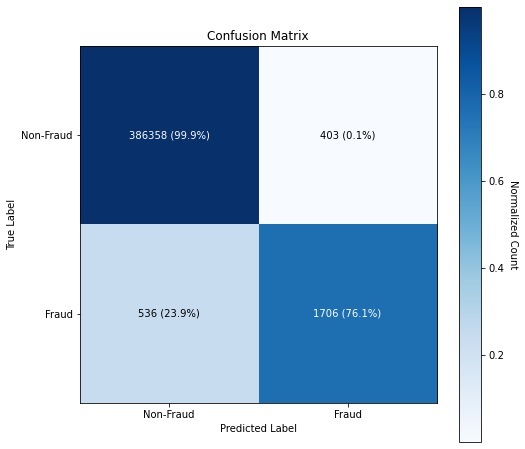

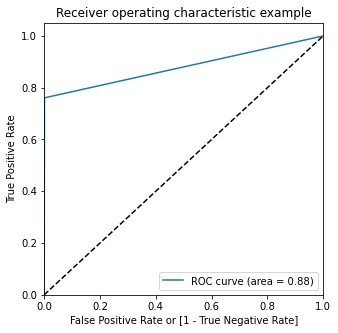

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
15,RFC | Final,Train,0.7,90.70,99.99,81.41,89.75,0.906995,81.41,99.99,272.10
0,RFC | Final,Test,0.7,87.99,80.89,76.09,78.42,0.997586,76.09,99.90,244.97


In [164]:
final_model_eval = evaluate_model_performance(model_2,'RFC | Final',X_train_resampled[selected_features], y_train_resampled, y_test, X_test[selected_features])

final_model_eval['best_params']

In [165]:
final_model_eval['evaluation_table']

,model,validation on,threshold,roc_auc,precision,recall,f1_score,accuracy,sensitivity,specificity,sort_weight
0,RFC | Final,Test,0.7,87.99,80.89,76.09,78.42,0.997586,76.09,99.90,244.97
1,RFC | Final,Test,0.8,85.21,87.68,70.47,78.14,0.997728,70.47,99.94,243.36
2,RFC | Final,Test,0.6,89.40,74.84,78.95,76.84,0.997257,78.95,99.85,243.19
3,RFC | Final,Test,0.5,90.63,67.24,81.49,73.68,0.996645,81.49,99.77,239.36
4,RFC | Final,Test,0.4,91.88,58.08,84.12,68.72,0.995586,84.12,99.65,234.08
5,RFC | Final,Test,0.9,79.83,93.70,59.68,72.92,0.997445,59.68,99.98,233.21
6,RFC | Final,Test,0.3,92.98,46.88,86.53,60.82,0.993573,86.53,99.43,226.39
7,RFC | Final,Test,0.2,94.42,33.44,89.88,48.75,0.989108,89.88,98.96,217.74
8,RFC | Final,Test,0.1,96.02,17.34,94.65,29.31,0.973689,94.65,97.38,208.01
9,RFC | Final,Train,0.1,97.60,98.07,97.12,97.59,0.976037,97.12,98.09,292.79


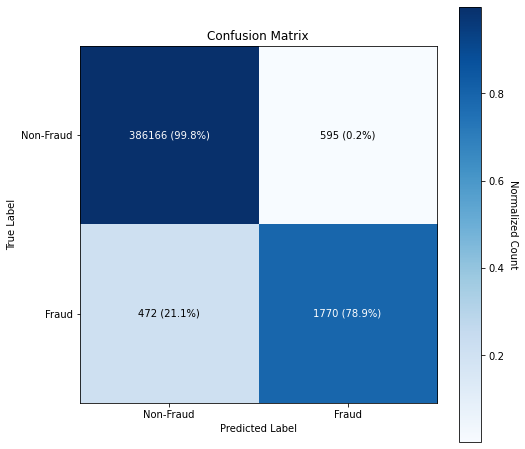

In [168]:
y_pred_optimal_threshold = (model_2.predict_proba(X_test[selected_features])[:,1] > 0.6).astype(np.int)
plot_confusion_matrix(y_test,y_pred_optimal_threshold,labels = ['Non-Fraud','Fraud'])

## Final_model selected - RFC final

## Threshold = 0.6 seems a better choice as ROC_AUC score is good alongwith balanced precision and recall

## 8. Cleaning Unseen Data

In [169]:
selected_features

['amt',
 'prev_trans_time_delay',
 'trans_hour_range_night',
 'category_grocery_pos',
 'trans_hour_range_afternoon',
 'category_gas_transport',
 'trans_hour_range_evening',
 'trans_hour_range_early_morning',
 'category_shopping_net',
 'trans_hour_range_morning',
 'category_travel',
 'city_pop',
 'cust_merc_dist',
 'prev_merch_dist',
 'category_misc_net',
 'category_misc_pos',
 'age_range_56-70',
 'gender_M',
 'age_range_26-40',
 'category_shopping_pos']

### 1.  Checking data types and columns

In [170]:
testData.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [171]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [172]:
testData['trans_date_trans_time'] = pd.to_datetime(testData['trans_date_trans_time'])
testData['dob'] = pd.to_datetime(testData['dob'])
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [173]:
# checking for duplicated rows
testData.duplicated().sum()

0

### 2. Checking for null values

In [174]:
testData.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### 3. Feature Engineering

#### 3.1 Features from trans_date_trans_time

In [175]:
testData['trans_hour'] = testData['trans_date_trans_time'].dt.hour# extracting hour  from datetime
testData['trans_day'] = testData['trans_date_trans_time'].dt.day_name()
testData['trans_month'] = testData['trans_date_trans_time'].dt.month_name()

for i in ['trans_hour','trans_day','trans_month']:
    print(testData[i].unique())

[12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11]
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
['June' 'July' 'August' 'September' 'October' 'November' 'December']


 **Binning trans_hour into** 
- Late Night:0-4
- Early Morning: 4-8
- Morning:8-12
- Afternoon:12-17
- Evening:17-21
- Night:21-0

In [176]:
trans_hour_bins=[-1,3,7,11,16,20,23]
trans_hour_labels=[ 'late_night','early_morning','morning','afternoon','evening','night',
                      ]
testData['trans_hour_range']=pd.cut(testData['trans_hour'],
                                       bins=trans_hour_bins,
                                       labels=trans_hour_labels)
testData['trans_hour_range'].value_counts()

afternoon        141030
evening          111973
night             85391
late_night        72953
early_morning     72196
morning           72176
Name: trans_hour_range, dtype: int64

In [177]:
testData['Age'] = (testData['trans_date_trans_time'] - testData['dob']).astype('timedelta64[Y]') 

In [178]:
age_bins=[10,25,40,55,70,100]
age_labels=[ '10-25','26-40','41-55','56-70','Above 70']

testData['age_range']=pd.cut(testData['Age'],
                                       bins=age_bins,
                                       labels=age_labels)
testData['age_range'].value_counts()

26-40       176282
41-55       172813
56-70        94719
Above 70     57891
10-25        54014
Name: age_range, dtype: int64

### 3.3 Features from lat, long ,merch_lat and merch_long

In [179]:
testData['cust_loc']=tuple(zip(testData['lat'],testData['long']))

In [ ]:
testData[['lat','long','cust_loc']]

In [ ]:
testData['merch_loc']=tuple(zip(testData['merch_lat'],testData['merch_long']))

In [ ]:
testData[['merch_lat','merch_long','merch_loc']]

In [ ]:
testData['cust_merc_dist']=testData.apply(lambda df:calculateHaverstine(df['cust_loc'],df['merch_loc']), axis=1)

In [ ]:
testData.sort_values(by = ['cc_num','unix_time'],ascending=False,inplace=True)

In [ ]:
testData.head(5)

In [ ]:
testData['prev_merch_loc']=testData.groupby(by='cc_num')['merch_loc'].shift(-1)

In [ ]:
testData[['cc_num','merch_loc','prev_merch_loc']]

In [ ]:
testData['prev_merch_loc'].fillna(testData['merch_loc'],inplace=True)

In [ ]:
testData['prev_merch_dist']=testData.apply(lambda df:calculateHaverstine(df['merch_loc'],df['prev_merch_loc']), axis=1)

In [ ]:
testData[['cc_num','merch_loc','prev_merch_loc','prev_merch_dist']]

In [ ]:
testData['prev_unix_time']=testData.groupby(by = ['cc_num'])['unix_time'].shift(-1)
testData['prev_unix_time'].fillna(testData['unix_time'] - 86400, inplace = True)

In [ ]:
# calculating time delay in terms of minutes
testData['prev_trans_time_delay'] = (testData['unix_time'] - testData['prev_unix_time'])//60

## 9. Predicting on Unseen Data

In [ ]:
testData.head()

In [ ]:
optimal_threshhold=0.6

### One-Hot Encoding

In [ ]:
testData.info()

In [ ]:
cat_cols = ['category', 'gender', 'trans_hour_range', 'trans_month', 'age_range']
cat_cols

In [ ]:
for i in cat_cols:
    ls = pd.get_dummies(testData[i], prefix=i,drop_first = True)
    #Adding the results to the master dataframe
    testData = pd.concat([testData,ls], axis=1)


In [ ]:
testData.columns

### Transformation

In [ ]:
applyTransformation(testData)

### Standardization

In [ ]:
testData.info()

In [ ]:
selected_features

In [ ]:
num_cols = ['amt','city_pop','cust_merc_dist','prev_merch_dist','prev_trans_time_delay']

In [ ]:
testData[num_cols] = scale.transform(testData[num_cols])

### Using Selected features used in model

In [ ]:
drop_col= ['Unnamed: 0','first','last','merchant','street','zip','job','city']
testData.drop(drop_col, axis =1, inplace = True)

In [ ]:
testData.info()

### Predicting probability

In [ ]:
selected_features

In [ ]:
optimal_threshhold

In [ ]:
testData['is_fraud_prob']=model_2.predict_proba(testData[selected_features])[:,1]
#converting it to a class variable 0: Non-Fraud Transaction ; 1: Fraud Transaction
testData['is_fraud_pred']=testData['is_fraud_prob'].apply(lambda x: 1 if x>optimal_threshhold else 0)

In [ ]:
testData.info()

In [ ]:
output = testData[['trans_num','is_fraud_prob','is_fraud_pred']]

In [ ]:
output.head(20)

In [ ]:
output['is_fraud_pred'].value_counts()

## 10. Cost Benefit Analysis

### 10.1 Before Model Building

In [ ]:
selected_features

In [ ]:
X_train['is_fraud_prob']=model_2.predict_proba(X_train[selected_features])[:,1]
X_train['is_fraud_pred']=X_train['is_fraud_prob'].apply(lambda x: 1 if x>optimal_threshhold else 0)

In [ ]:
X_test['is_fraud_prob']=model_2.predict_proba(X_test[selected_features])[:,1]
X_test['is_fraud_pred']=X_test['is_fraud_prob'].apply(lambda x: 1 if x>optimal_threshhold else 0)

In [ ]:
edaData.shape

In [ ]:
left_cols=['trans_num','trans_date_trans_time','is_fraud_pred']
columns=left_cols.extend(selected_features)

### in order to get actual is_fraud values, we need to merge the split data with main data

In [ ]:
X_train_res=X_train[columns]
X_test_res=X_test[columns]

In [ ]:
X_test_res.head()

In [ ]:
X_train_res.head()

In [ ]:
train_data=pd.concat([X_train_res,X_test_res],axis=0)
train_data.head()

In [ ]:
X_train_res.shape,X_test_res.shape,train_data.shape

In [ ]:
train_data.isnull().sum()

In [ ]:
train_data.info()

In [ ]:
trainDataComplete= trainDataCopy[['trans_num','trans_date_trans_time','is_fraud','amt']]
trainDataComplete.info()

In [ ]:
trainDataComplete['trans_date_trans_time'] = pd.to_datetime(trainDataComplete['trans_date_trans_time'])
trainDataComplete.info()

- Looks good!

In [ ]:
cost_ana_data=pd.merge(train_data,trainDataComplete[['trans_num','is_fraud']],how='inner',on='trans_num')

In [ ]:
cost_ana_data.shape

In [ ]:
cost_ana_data.head()

In [ ]:
testData[['trans_num','trans_date_trans_time','is_fraud_pred','amt','prev_trans_time_delay','city_pop','cust_merc_dist'']].head()

In [ ]:
final_cost_data=pd.concat([cost_ana_data,testData[['trans_num','trans_date_trans_time','is_fraud_pred','amt','prev_trans_time_delay','city_pop','cust_merc_dist']]],axis=0)
final_cost_data.shape

In [ ]:
sns.pairplot(edaData[['prev_trans_time_delay','amt','cust_merc_dist','prev_merch_dist']],hue=edaData['is_fraud'])

In [ ]:
final_cost_data.tail()

In [ ]:
final_cost_data['yr_month'] = final_cost_data['trans_date_trans_time'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m'))

In [ ]:
final_cost_data.head()

#### Average number of transactions per month

In [ ]:
cb_data = final_cost_data.groupby(['yr_month'])['trans_num'].count().reset_index()
cb_data['trans_num'].mean()

#### Avg no of fraudulant transactions per month

In [ ]:
fraud_data = final_cost_data[final_cost_data['is_fraud'] == 1]
fraud_data.shape

In [ ]:
cb_data_fraud = fraud_data.groupby(['yr_month'])['trans_num'].count().reset_index()
cb_data_fraud['trans_num'].mean()

#### Avg amount per fraud

In [ ]:
avg_amount = fraud_data['amt'].mean()
print(f'avg amount per fraud: {avg_amount}')

### 10.2 After Model Building

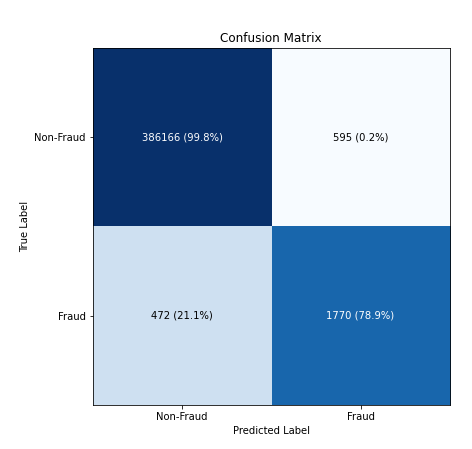

### Average number of transactions per month detected as fraudulent by the model (TF)

In [ ]:
final_cost_data.head()

In [ ]:
final_cost_data[final_cost_data['is_fraud_pred']==0 ].shape

In [ ]:
final_cost_data['is_fraud_pred'].value_counts()

In [ ]:
final_cost_data['is_fraud'].value_counts()

In [ ]:
cost_per_month=final_cost_data[final_cost_data['is_fraud_pred']==1].groupby(by='yr_month')['trans_num'].count()
round(cost_per_month.mean())

### Average number of transactions per month that are fraudulent but are not detected by the model

In [ ]:
final_cost_data[(final_cost_data['is_fraud_pred']==0) & (final_cost_data['is_fraud']==1 )]

In [ ]:
loss_per_month=final_cost_data[(final_cost_data['is_fraud_pred']==0) & (final_cost_data['is_fraud']==1 )].groupby(by='yr_month')['trans_num'].count()
round(loss_per_month.mean())